# General Preamble Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

# Additional Import Code for dataset W

In [2]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
# data (as pandas dataframes) 
x = wine_quality.data.features 
y = wine_quality.data.targets['quality']


In [3]:
print("Features (x):")
display(x)
print("\nTarget (y):")
display(y)

Features (x):


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8



Target (y):


0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64

# Question 1
## Run a linear regression on the entire wine dataset. Measure R-squared on both the training and test data sets. Also evaluate the resulting MSE and RMSE. 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

print("############ Assignment 2 Question 1 BEGIN ############")
# split data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

# fit and predict
lr = LinearRegression()
lr.fit(x_train, y_train)
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print(f"R^2 (train): {r2_train:.4f}")
print(f"R^2 (test): {r2_test:.4f}")
print(f"MSE (train): {mse_train:.4f}")
print(f"MSE (test): {mse_test:.4f}")
print(f"RMSE (train): {rmse_train:.4f}")
print(f"RMSE (test): {rmse_test:.4f}")
print("############# Assignment 2 Question 1 END #############")

############ Assignment 2 Question 1 BEGIN ############
R^2 (train): 0.3017
R^2 (test): 0.2589
MSE (train): 0.5369
MSE (test): 0.5507
RMSE (train): 0.7328
RMSE (test): 0.7421
############# Assignment 2 Question 1 END #############


# Question 2
## Now categorize “good wines” as those securing a score of 7 or higher. All other wines are “bad wines”. Run a logistic regression to see whether you can predict good wines. Evaluate this model with a visualized confusion matrix, and an accuracy score.

############ Assignment 2 Question 2 BEGIN ############


/Users/fustin/miniconda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


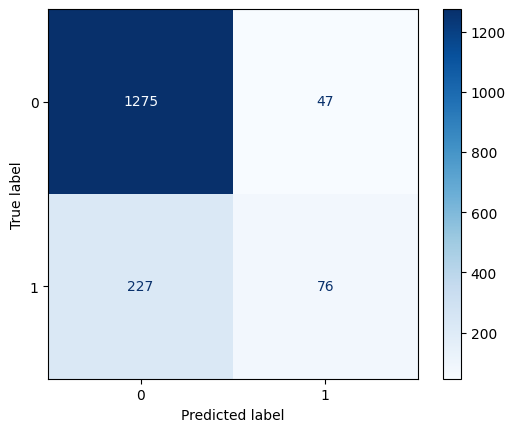

Accuracy: 0.8314
############# Assignment 2 Question 2 END #############


In [ ]:
print("############ Assignment 2 Question 2 BEGIN ############")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# labeling 1 for good wine (quality >= 7) and 0 otherwise
y_bin = (y >= 7).astype(int)
y_train_bin = y_bin[y_train.index]
y_test_bin = y_bin[y_test.index]

# fit logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train_bin)
y_pred = logreg.predict(x_test)

# confusion matrix and accuracy
cm = confusion_matrix(y_test_bin, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

acc = accuracy_score(y_test_bin, y_pred)
print(f"Accuracy: {acc:.4f}")
print("############# Assignment 2 Question 2 END #############")

# Question 3
## Why doesn’t the number of wines in the confusion matrix add up to the total number of wines in the original dataset?

In [6]:
print("############ Assignment 2 Question 3 BEGIN ############")
print(f"Total wines in original dataset: {len(y)}")
print(f"Total wines in confusion matrix (test set): {cm.sum()}")

print(
    "The confusion matrix only counts wines in the test set, not the whole dataset. "
    "This is because the data was split into training and test sets, so only the test set predictions are shown in the confusion matrix."
)
print("############# Assignment 2 Question 3 END #############")

############ Assignment 2 Question 3 BEGIN ############
Total wines in original dataset: 6497
Total wines in confusion matrix (test set): 1625
The confusion matrix only counts wines in the test set, not the whole dataset. This is because the data was split into training and test sets, so only the test set predictions are shown in the confusion matrix.
############# Assignment 2 Question 3 END #############


# Question 4
## Repeat 1 and 2 for just the red wine and white wine datasets. Report your findings and remark on why this did or didn’t improve the evaluation results.

In [ ]:
print("############ Assignment 2 Question 4 BEGIN ############")

print("############# Assignment 2 Question 4 END #############")

# Question 5
## Now add “color” as an independent variable (a feature) into the linear regression and rerun the model. What encoding choice did you use for this feature? Evaluate the new model and compare it to the baseline you have in (1). Did it show an improvement? If so, was it as big as the improvement in (4) where you split the data set by colors? If not, why not?

In [ ]:
print("############ Assignment 2 Question 5 BEGIN ############")

print("############# Assignment 2 Question 5 END #############")

# Question 6
## When you transformed “quality score” for the logistic regression in (2), what kind of variable-type transformation did you perform?

In [ ]:
print("############ Assignment 2 Question 6 BEGIN ############")

print("############# Assignment 2 Question 6 END #############")